In [33]:
import os
import pandas as pd
import pyemb as eb
import numpy as np
from scipy import sparse

In [34]:
ling=pd.read_excel(os.path.join("Pipeline results","matched_linguistic_similarity.xlsx"),index_col=0)
gene=pd.read_excel(os.path.join("Pipeline results","matched_genetic_similarity.xlsx"),index_col=0)
print(ling.iloc[0:4,0:4])
print(gene.iloc[0:4,0:4])

               Agta  Agutaynen      Arta       Ata
Agta       1.385157   1.014636  1.523644  0.900072
Agutaynen  1.014636   1.852796  0.818716  0.947172
Arta       1.523644   0.818716  1.788966  0.706974
Ata        0.900072   0.947172  0.706974  1.578480
               Agta  Agutaynen      Arta       Ata
Agta       7.089624   0.784452  0.704762  0.559568
Agutaynen  0.784452   4.213665  0.649343  0.397442
Arta       0.704762   0.649343  2.817449  0.349508
Ata        0.559568   0.397442  0.349508  5.262851


In [35]:
As0 = []
As0.append(sparse.csr_matrix(ling))
As0.append(sparse.csr_matrix(gene))

As0log = []
As0log.append(sparse.csr_matrix(np.log(ling)))
As0log.append(sparse.csr_matrix(np.log(gene)))

In [36]:
ling_thresh=np.quantile(ling.to_numpy().flatten(),0.9)
gene_thresh=np.quantile(gene.to_numpy().flatten(),0.9)
ling_bin=(ling>ling_thresh).astype(int)
gene_bin=(gene>gene_thresh).astype(int)

In [37]:
node_labels=list(ling.index)
node_labels2=[0 for x in range(len(node_labels))]
n = len(node_labels)
T=2
As = []
As.append(sparse.csr_matrix(ling_bin))
As.append(sparse.csr_matrix(gene_bin))

In [38]:
UASE_emb = eb.dyn_embed(As, d=5, method="UASE", flat=False)
UASE_emb0 = eb.dyn_embed(As0, d=5, method="URLSE", flat=False)
UASE_emb0log = eb.dyn_embed(As0log, d=5, method="UASE", flat=False)

In [39]:
UASE_emb0[0,:,[2,3]]


array([[-0.00283248,  0.00904515, -0.00388405,  0.00807991,  0.01319689,
        -0.03277977,  0.00514167,  0.01163422,  0.0074623 ,  0.01538134,
        -0.00291233, -0.03857569, -0.00090133,  0.00353024,  0.00989869,
        -0.00940499,  0.00396805,  0.01392535, -0.03020546, -0.0189981 ,
        -0.02883506,  0.01513096, -0.03538322,  0.00053429,  0.01414037,
         0.00752253,  0.00829911,  0.01323138,  0.00994879,  0.01888584,
         0.00966789, -0.01202626,  0.00786162,  0.01401996,  0.01541998,
         0.0113985 ,  0.00911609,  0.0109667 ,  0.0141601 ,  0.01786937,
        -0.02891622,  0.01436076,  0.01356659],
       [-0.00387676, -0.00387349, -0.00267051,  0.00602697,  0.00091058,
        -0.00206424, -0.00024459, -0.00545208, -0.00325421,  0.00277437,
        -0.0010669 , -0.00274099, -0.00125453,  0.00069424, -0.00369159,
        -0.00271817, -0.00237495,  0.0012031 , -0.0007239 , -0.00267   ,
        -0.00201263,  0.00299386, -0.00307129, -0.00136687, -0.00075714,
   

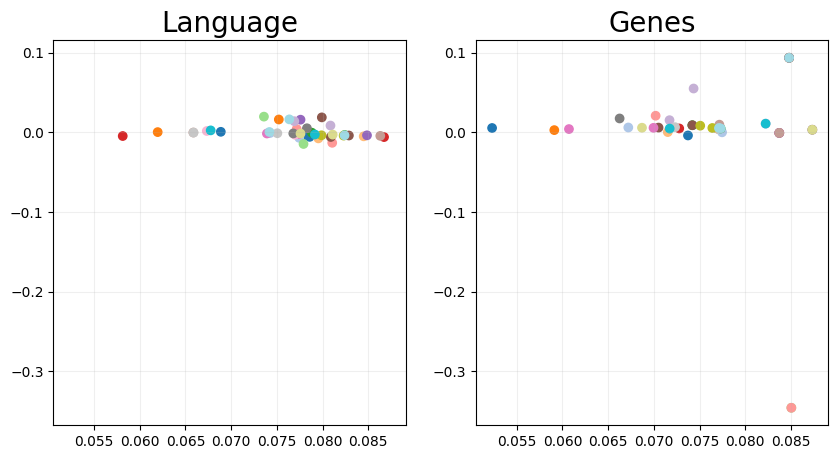

In [40]:
# Select snapshots to be shown
points_of_interest = [0, 1]
point_labels = ["Language", "Genes"]

# Plot the snapshots
UASE_fig0 = eb.snapshot_plot(
    UASE_emb0,
    node_labels = node_labels,
    idx_of_interest = points_of_interest,
    title = point_labels,
    sharex = True,
    sharey = True,
    tick_labels = True,
    add_legend=False,
    cmap="tab20"
)

# Apply any further adjustments to the plot
_ = UASE_fig.suptitle("UASE of raw similarities")


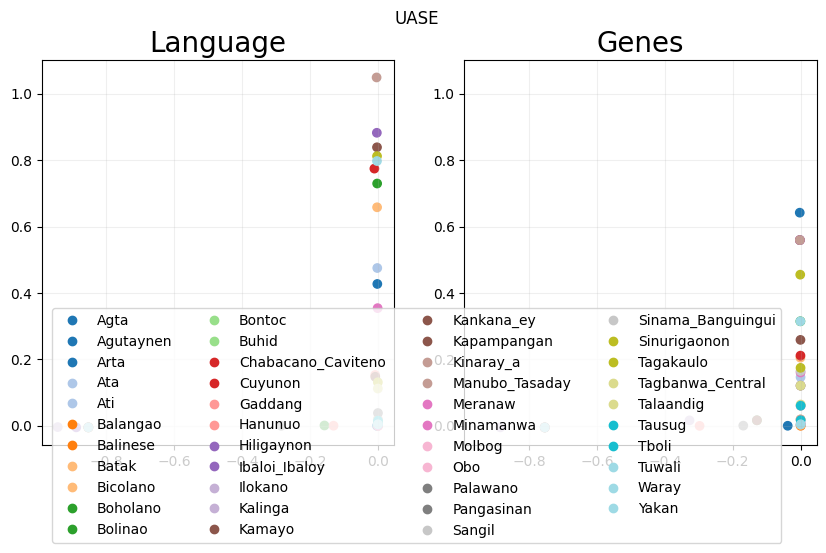

In [41]:
# Select snapshots to be shown
points_of_interest = [0, 1]
point_labels = ["Language", "Genes"]

# Plot the snapshots
UASE_fig = eb.snapshot_plot(
    UASE_emb,
    node_labels = node_labels,
    idx_of_interest = points_of_interest,
    title = point_labels,
    sharex = True,
    sharey = True,
    tick_labels = True,
    add_legend=True,
    cmap="tab20"
)

# Apply any further adjustments to the plot
_ = UASE_fig.suptitle("UASE")


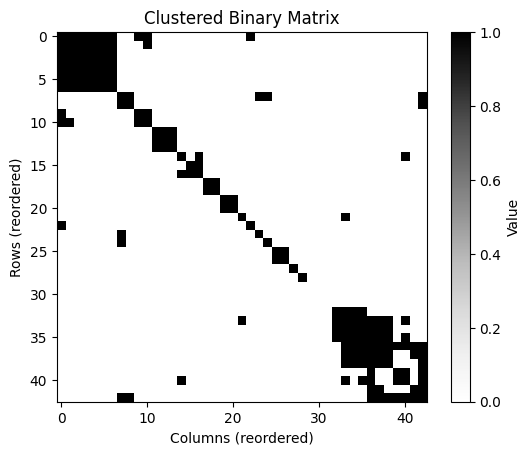

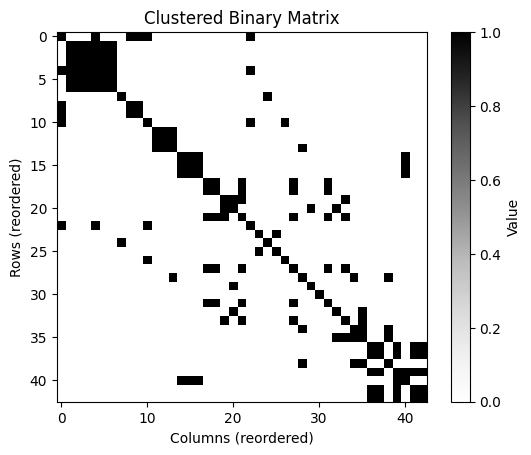

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist, squareform

# Your binary matrix
np.random.seed(0)

matrix=np.array(ling_bin)
# Compute row linkage
row_dist = pdist(matrix, metric='hamming')  # or 'euclidean', 'jaccard' if sparse
row_linkage = linkage(row_dist, method='average')
row_order = leaves_list(row_linkage)

# Apply row ordering to both rows and columns
clustered_matrix = matrix[row_order, :][:, row_order]
clustered_matrix2 = np.array(gene_bin)[row_order, :][:, row_order]

# Plot
plt.imshow(clustered_matrix, cmap='Greys', interpolation='nearest')
plt.title("Clustered Binary Matrix")
plt.xlabel("Columns (reordered)")
plt.ylabel("Rows (reordered)")
plt.colorbar(label="Value")
plt.show()

plt.imshow(clustered_matrix2, cmap='Greys', interpolation='nearest')
plt.title("Clustered Binary Matrix")
plt.xlabel("Columns (reordered)")
plt.ylabel("Rows (reordered)")
plt.colorbar(label="Value")
plt.show()